In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D

In [2]:
change_axis = np.array([
    [-1,0,0,0],
    [0,0,1,0],
    [0,1,0,0],
    [0,0,0,1]
])

In [3]:
def translate(r):
    return np.array([
        [1,0,0,0],
        [0,1,0,r],
        [0,0,1,0],
        [0,0,0,1]
    ])

In [4]:
def rotate_phi(phi):
    angle = (phi-90)/180.*np.pi
    c, s = np.cos(angle), np.sin(angle)
    return np.array([
        [1,0,0,0],
        [0, c,-s, 0],
        [0,s,c,0],
        [0,0,0,1]
    ])


In [5]:
def rotate_theta(theta):
    angle = (90-theta)/180.*np.pi
    c, s = np.cos(angle), np.sin(angle)
    return np.array([
        [c,-s,0,0],
        [s,c,0,0],
        [0,0,1,0],
        [0,0,0,1]
    ])

In [6]:
def w2c(r,theta, phi):
    return change_axis @ translate(-r) @ rotate_phi(phi) @ rotate_theta(theta)
def c2w(r,theta,phi):
    return rotate_theta(theta).T @ rotate_phi(phi).T @ translate(r) @ change_axis

In [28]:
origin = np.array([0,0,0,1])[...,None]
view_dir = np.array([0,0,-1,1])[...,None]
upward = np.array([0,1,0,1])[...,None]
rightward = np.array([1,0, 0,1])[...,None]

In [4]:
transformation_mat = np.array(
    [
        [
            -0.9999021887779236,
            0.004192245192825794,
            -0.013345719315111637,
            -0.05379832163453102,
        ],
        [
            -0.013988681137561798,
            -0.2996590733528137,
            0.95394366979599,
            3.845470428466797,
        ],
        [
            -4.656612873077393e-10,
            0.9540371894836426,
            0.29968830943107605,
            1.2080823183059692,
        ],
        [0.0, 0.0, 0.0, 1.0],
    ]
)
transformation_mat2 = np.array(
    [
        [
            -0.9305422306060791,
            0.11707554012537003,
            -0.34696459770202637,
            -1.398659110069275,
        ],
        [
            -0.3661845624446869,
            -0.29751041531562805,
            0.8817007541656494,
            3.5542497634887695,
        ],
        [
            7.450580596923828e-09,
            0.9475130438804626,
            0.3197172284126282,
            1.2888214588165283,
        ],
        [0.0, 0.0, 0.0, 1.0],
    ]
)

transformation_mat3 = np.array(
    [
        [
            0.4429636299610138,
            0.31377720832824707,
            -0.8398374915122986,
            -3.385493516921997,
        ],
        [
            -0.8965396881103516,
            0.1550314873456955,
            -0.41494810581207275,
            -1.6727094650268555,
        ],
        [0.0, 0.936754584312439, 0.3499869406223297, 1.4108426570892334],
        [0.0, 0.0, 0.0, 1.0],
    ]
)

In [27]:
(transformation_mat3 @ origin)

array([[-3.38549352],
       [-1.67270947],
       [ 1.41084266],
       [ 1.        ]])

4.679363591053587e-08
0.7071067187106258
2.2512452707568187e-08
-1.130206755961538e-08
0.7071067496074207
-1.7664280038687252e-08
1.9270376128144306e-09
0.7071067192257462
1.7226477404264084e-08


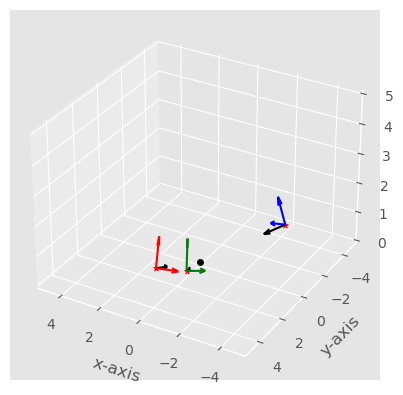

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(0, 0, 0, c="black")
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([0, 5])
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")

def draw(mat, color):
    start = (mat @ origin)[:3,0]
    front = (mat @ -view_dir)[:3,0]
    front -= start
    front /= np.linalg.norm(front)
    up = (mat @ upward)[:3,0]
    up -= start
    up /= np.linalg.norm(up)
    right = (mat @ rightward)[:3,0]
    right -= start
    right /= np.linalg.norm(right)
    ax.scatter(*start, c="red", marker="*")
    ax.quiver(*start, *front, color='black')
    ax.quiver(*start, *up, color=color)
    ax.quiver(*start, *right, color=color)
    print(front.dot(up))
    print(front.dot(right))
    print(up.dot(right))

draw(transformation_mat, "red")
draw(transformation_mat2, "green")
draw(transformation_mat3, "blue")
ax.view_init(elev=30., azim=120)

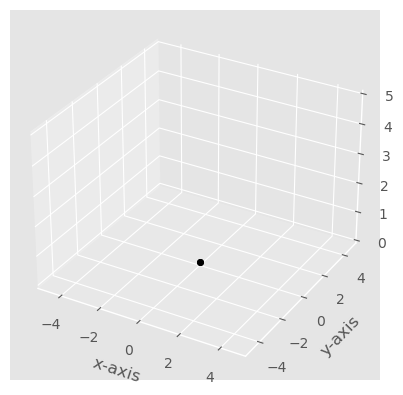

In [22]:


from matplotlib import animation

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

def init():
    ax.scatter(0, 0, 0, c="black")
    ax.set_xlim([-5, 5])
    ax.set_ylim([-5, 5])
    ax.set_zlim([0, 5])
    ax.set_xlabel("x-axis")
    ax.set_ylabel("y-axis")
    return fig,

def animate(i):
    start = transformation_mat[:3, -1]
    x_axis_transform = transformation_mat[:3, 0]
    y_axis_transform = transformation_mat[:3, 1]
    z_axis_transform = -transformation_mat[:3, 2]
    ax.scatter(*start, c="red", marker="*")
    ax.quiver(*start, *x_axis_transform, color="g")
    ax.quiver(*start, *y_axis_transform, color="g")
    ax.quiver(*start, *z_axis_transform, color="k")

    start = transformation_mat2[:3, -1]
    x_axis_transform = transformation_mat2[:3, 0]
    y_axis_transform = transformation_mat2[:3, 1]
    z_axis_transform = -transformation_mat2[:3, 2]
    ax.scatter(*start, c="red", marker="+")
    ax.quiver(*start, *x_axis_transform, color="b")
    ax.quiver(*start, *y_axis_transform, color="b")
    ax.quiver(*start, *z_axis_transform, color="k")

    start = transformation_mat3[:3, -1]
    x_axis_transform = transformation_mat3[:3, 0]
    y_axis_transform = transformation_mat3[:3, 1]
    z_axis_transform = -transformation_mat3[:3, 2]
    ax.scatter(*start, c="red", marker="+")
    ax.quiver(*start, *x_axis_transform, color="r")
    ax.quiver(*start, *y_axis_transform, color="r")
    ax.quiver(*start, *z_axis_transform, color="k")
    ax.view_init(elev=10., azim=i)
    
    return fig,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)

anim.save('mpl3d_scatter.gif', fps=30)

dot with up [1.]  /  dot with front [-1.]
dot with up [1.]  /  dot with front [-1.]
dot with up [1.]  /  dot with front [-1.]
dot with up [1.]  /  dot with front [-1.]
dot with up [1.]  /  dot with front [-1.]


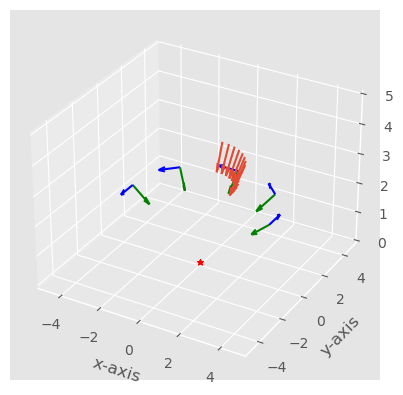

In [9]:
r = 4
phi = 30
thetas = np.linspace(0, 90, 10)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for theta in thetas:
    start = c2w(r,theta, phi) @ origin
    dest = c2w(r,theta, phi) @ view_dir
    delta = dest - start
    ax.quiver(start[0], start[1], start[2], delta[0], delta[1], delta[2])

phi = 60
thetas = np.linspace(0, 180, 5)
for theta in thetas:
    matrix = c2w(r,theta, phi)
    start =  matrix @ origin
    dest = matrix @ view_dir
    up = matrix @ upward
    delta = dest - start

    ax.scatter(*(0,0,0), c='red', marker='*')
    ax.quiver(start[0], start[1], start[2], delta[0], delta[1], delta[2], color='g')
    ax.quiver(start[0], start[1], start[2], matrix[:3,0][0], matrix[:3,0][1], matrix[:3,0][2], color='b')
    print(f"dot with up {matrix[:3,1].T @ up[:3]}  /  dot with front {matrix[:3,2] @ delta[:3]}")

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([0, 5])
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
plt.show()

In [57]:
v1.shape

(3,)

(-5.0, 5.0)

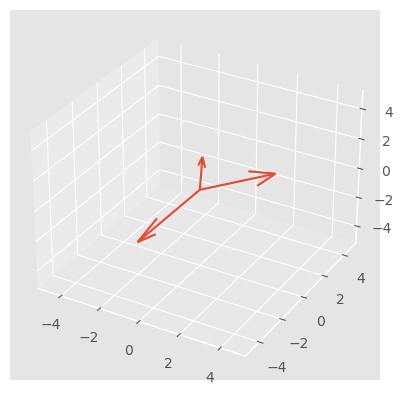

In [65]:
v1 = np.array([6,1,0])
v2 = np.array([0,2,1])
v3 = np.array([1,5,-2])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0,0,0, *(matrix[:3,:3]@v1.T))
ax.quiver(0,0,0, *(matrix[:3,:3]@v2.T))
ax.quiver(0,0,0, *(matrix[:3,:3]@v3.T))
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])

In [ ]:
v = np.array([[6, 1, 0], [0, 2, 1], [1, 5, -2], [0,0,0]])


fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.quiver(0, 0, 0, *(matrix[:3, :3] @ v1.T))
ax.quiver(0, 0, 0, *(matrix[:3, :3] @ v2.T))
ax.quiver(0, 0, 0, *(matrix[:3, :3] @ v3.T))
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])

In [68]:
print((matrix[:3,:3]@v1.T))

[ 0.5       -6.         0.8660254]


In [79]:
v = np.array([[[6, 1, 0], [0, 2, 1]], [[1, 5, -2], [0,0,0]]])
(matrix[:3,:3]@v[...,None])

array([[[[ 5.00000000e-01],
         [-6.00000000e+00],
         [ 8.66025404e-01]],

        [[ 1.33974596e-01],
         [-8.20357802e-18],
         [ 2.23205081e+00]]],


       [[[ 4.23205081e+00],
         [-1.00000000e+00],
         [ 3.33012702e+00]],

        [[ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00]]]])

In [70]:
v = np.array([[6, 1, 0], [0, 2, 1], [1, 5, -2], [0,0,0]])
(matrix[:3,:3]@v.T).T

array([[ 5.00000000e-01, -6.00000000e+00,  8.66025404e-01],
       [ 1.33974596e-01, -8.20357802e-18,  2.23205081e+00],
       [ 4.23205081e+00, -1.00000000e+00,  3.33012702e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [ ]:
v1 = torch.tensor([1,1,0])
matrix *

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(start[0], start[1], start[2], delta[0], delta[1], delta[2])

In [1]:
import torch
import numpy as np

trans_t = lambda t : torch.Tensor([
    [1,0,0,0],
    [0,1,0,0],
    [0,0,1,t],
    [0,0,0,1]]).float()

rot_phi = lambda phi : torch.Tensor([
    [1,0,0,0],
    [0,np.cos(phi),-np.sin(phi),0],
    [0,np.sin(phi), np.cos(phi),0],
    [0,0,0,1]]).float()

rot_theta = lambda th : torch.Tensor([
    [np.cos(th),0,-np.sin(th),0],
    [0,1,0,0],
    [np.sin(th),0, np.cos(th),0],
    [0,0,0,1]]).float()

In [2]:
def pose_spherical(theta, phi, radius):
    c2w = trans_t(radius)
    c2w = rot_phi(phi/180.*np.pi) @ c2w
    c2w = rot_theta(theta/180.*np.pi) @ c2w
    c2w = torch.Tensor(np.array([[-1,0,0,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]])) @ c2w
    return c2w

In [3]:
pose_spherical(120, 30, 4)

tensor([[ 0.5000,  0.4330,  0.7500,  3.0000],
        [ 0.8660, -0.2500, -0.4330, -1.7321],
        [ 0.0000,  0.8660, -0.5000, -2.0000],
        [ 0.0000,  0.0000,  0.0000,  1.0000]])